In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['figure.facecolor'] = '#FFFFFF'

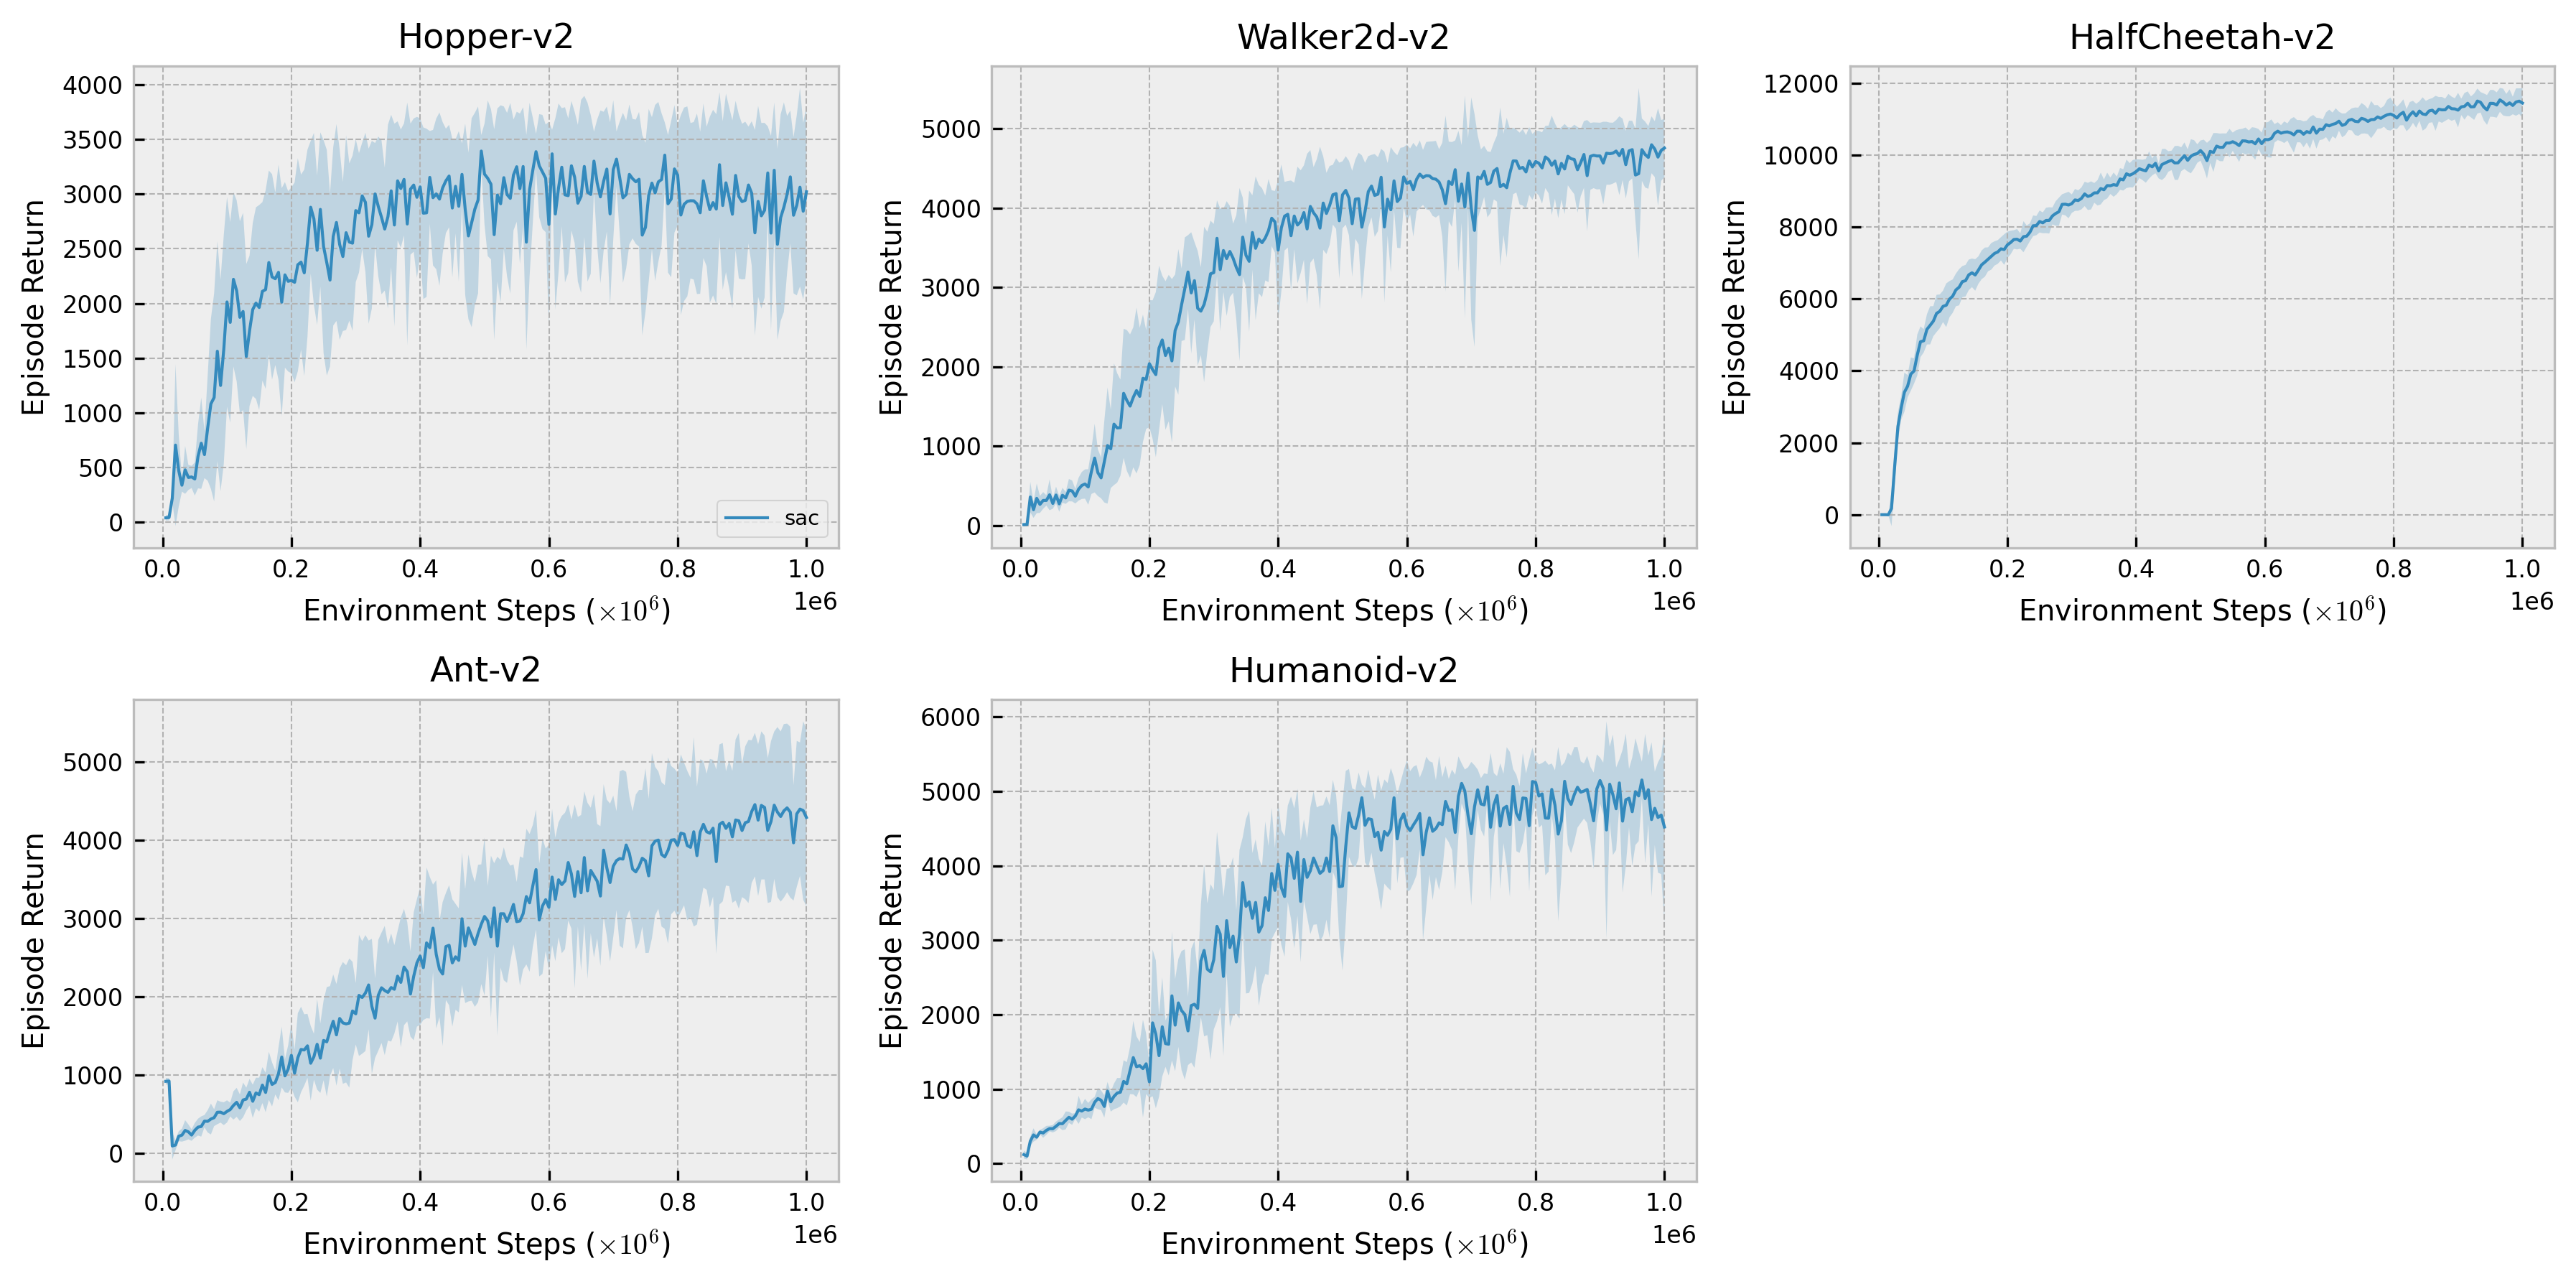

In [5]:
env_names = ['Hopper-v2', 'Walker2d-v2', 'HalfCheetah-v2', 'Ant-v2', 'Humanoid-v2'] 
nenvs = 5
nrow = 2
ncol = (nenvs + nrow - 1) // nrow

fig, axs = plt.subplots(nrow, ncol, figsize=(4 * ncol, 3 * nrow))

log_dirs = [
    ('logs', 'sac'),
]
    
for log_dir, label in log_dirs:
    for i in range(ncol * nrow):
        row = i // ncol
        col = i % ncol
        ax = axs[row, col]
        if i < len(env_names):
            env_dir = os.path.join(log_dir, env_names[i])
            if os.path.isdir(env_dir):
                all_results = []

                min_len = 1e6
                for result in os.listdir(env_dir):
                    if 'txt' in result:
                        result_file = os.path.join(env_dir, result)
                        results = np.loadtxt(result_file)
                        all_results.append(results)
                        min_len = min(min_len, results.shape[0])

                all_results = [result[:min_len] for result in all_results]
                all_results = np.stack(all_results, axis=0)

                xs = all_results[0, :, 0]
                mean = np.mean(all_results[:, :, 1], axis=0)
                std = np.std(all_results[:, :, 1], axis=0)
                ax.plot(xs, mean, label=label, linewidth=1)
                ax.fill_between(xs, mean - std, mean + std, alpha=0.25)
                ax.set_xlabel('Environment Steps ($\\times 10^6%$)')
                ax.set_ylabel('Episode Return')
                ax.set_title(env_names[i])
                if i == 0:
                    ax.legend()
        else:
            ax.axis('off')
plt.tight_layout()
plt.show()